# Exploring other types of plots for temporal data

- Calender plot 
- Polar bar chart


## Load the Dataset & Aggregate Crimes by Date

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Assignment-1/Data/SF_Crime_Data_Focus_Cleaned.csv', parse_dates=["Incident Date"])

## Calendar plot 

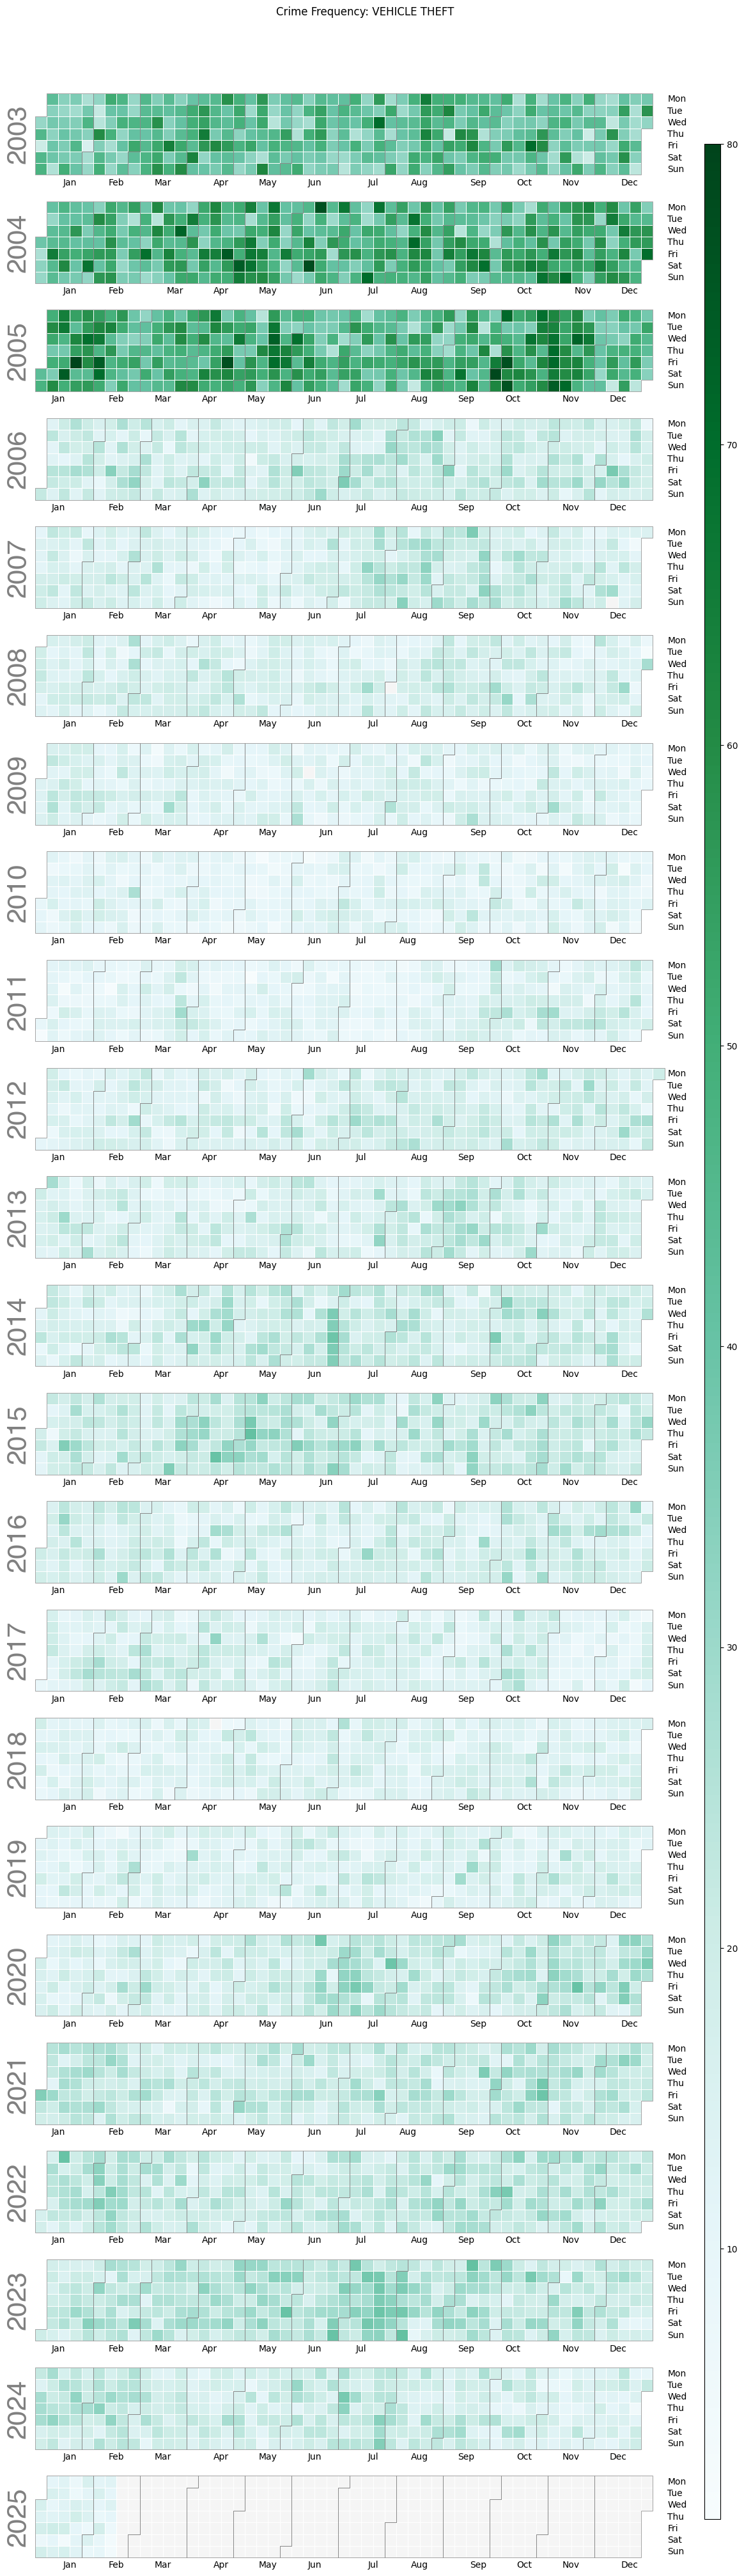

In [11]:
import calplot

# Select a specific crime type 
crime_type = "VEHICLE THEFT" 

# Aggregate crime counts per day for the selected crime type
crime_daily = df[df["Incident Category"] == crime_type].groupby("Incident Date").size()

# Plot the calendar heatmap
calplot.calplot(crime_daily, cmap="BuGn", colorbar=True, suptitle=f"Crime Frequency: {crime_type}", linewidth=0.5, dropzero=True, edgecolor="gray")

# Show the plot
plt.show()


Based on the calendar plot, it can be seen that in San Francisco from 2003 to 2023 highlights a striking trend. The years 2003 to 2005 show a significantly higher frequency of vehicle thefts compared to the following years, with crime rates appearing consistently high throughout these years. However, from 2006 onwards, there is a noticeable decline, with thefts becoming less frequent and relatively stable after 2010 than the early 2000. However it is noted that it gets a little worse in 2020 from 2010 but it is no why near the amount it was in the early to midt 2000s.  

## Polar bar chart

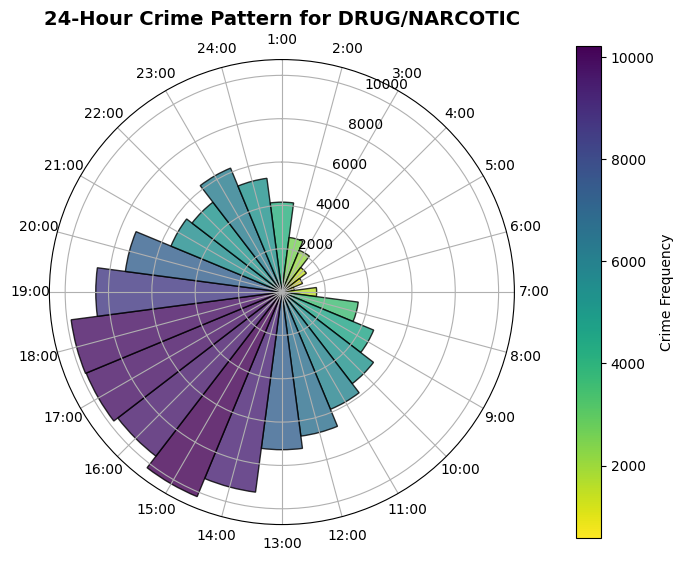

In [13]:
import matplotlib.cm as cm

crime_type = "DRUG/NARCOTIC"  

# Filter dataset for the selected crime
df_crime = df[df["Incident Category"] == crime_type]

# Aggregate crime counts per hour (count number of occurrences of each hour)
crime_hourly = df_crime["Incident Time"].value_counts().sort_index()

angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)  
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Normalize crime data for color mapping
norm = plt.Normalize(vmin=crime_hourly.min(), vmax=crime_hourly.max())
colors = cm.viridis_r(norm(crime_hourly))

# Bar chart in polar coordinates
bars = ax.bar(angles, crime_hourly, width=np.pi/12, bottom=0, color=colors, alpha=0.8, edgecolor="black")

sm = plt.cm.ScalarMappable(cmap=cm.viridis_r, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.8, pad=0.1)
cbar.set_label("Crime Frequency")

# Format the polar plot
ax.set_theta_zero_location("N")  
ax.set_theta_direction(-1)  
ax.set_xticks(angles)  
ax.set_xticklabels([f"{h}:00" for h in range(1, 25)])  # Adjust hour labels to 1-24
ax.set_title(f"24-Hour Crime Pattern for {crime_type}", fontsize=14, fontweight="bold")

plt.show()


Based on the polar plot it is revealed the that drug/narcotic related crimes peak between 1 PM and 6 PM, with frequencies ranging between 8000 and 9000 incidents. This suggests increased drug activity during the late afternoon and early evening. In contrast, crime occurrences are significantly lower during the early morning hours (midnight to 6 AM), as indicated by the lighter-colored and smaller bars.